In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
import cv2

In [ ]:
data_path = 'drive/MyDrive/Nherang/KHongnherang'
image_list = []


for file_name in os.listdir(data_path):
  img = cv2.imread(os.path.join(data_path, file_name))
  image_list.append(cv2.resize(img, (150, 150), interpolation = cv2.INTER_AREA))


In [ ]:
image_list = np.array(image_list)
print('[*] Length: ', len(image_list))
print('[*] Shape: ', image_list.shape)


[*] Length:  51
[*] Shape:  (51, 150, 150, 3)


In [ ]:
image_list.shape

(51, 150, 150, 3)

In [ ]:
y = []

for i in range(len(image_list)):
  if i <= 80:
    y.append(1)
  else: 
    y.append(0)

In [ ]:
y = np.array(y)
print(y.shape)

(51,)


In [ ]:
X_train = []
X_test = []
for img in image_list[:20]:
  X_train.append(img)

for img in image_list[-10:]:
  X_train.append(img)

for img in image_list[20:60]:
  X_test.append(img)

X_train = np.array(X_train)
X_test = np.array(X_test)
print(X_train.shape)
print(X_test.shape)

(30, 150, 150, 3)
(31, 150, 150, 3)


In [ ]:
y_train = []
y_test = []
for img in y[:20]:
  y_train.append(img)

for img in y[-10:]:
  y_train.append(img)

for img in y[20:50]:
  y_test.append(img)

y_train = np.array(y_train)
y_test = np.array(y_test)
print(y_train.shape)
print(y_test.shape)

(30,)
(30,)


In [ ]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

In [ ]:
y_train

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
from skimage import color

X_train = color.rgb2gray(X_train)
print(X_train.shape)
X_test = color.rgb2gray(X_test)
print(X_test.shape)
X = X_test

(30, 150, 150)
(31, 150, 150)


<function matplotlib.pyplot.show>

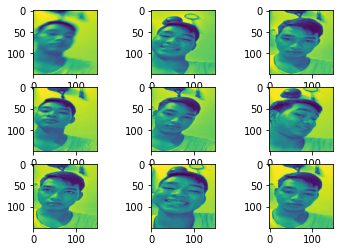

In [ ]:
for i in range(9):
  plt.subplot(330 + i + 1)
  plt.imshow(X_train[i])
plt.show

In [ ]:
X_train = X_train.reshape(80, 22500)
X_test = X_test.reshape(20, 22500)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 22500)
(20, 22500)
(80, 2, 2)
(20, 2, 2)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(512, activation = 'relu',input_shape=(22500,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               11520512  
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 1024)              525312    
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 2)                

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 64, epochs = 15, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/15
2/2 [==============================] - 1s 322ms/step - loss: 1.2501 - accuracy: 0.7375 - val_loss: 0.5149 - val_accuracy: 0.8500
Epoch 2/15
2/2 [==============================] - 0s 154ms/step - loss: 0.2803 - accuracy: 0.9125 - val_loss: 0.2355 - val_accuracy: 0.8500
Epoch 3/15
2/2 [==============================] - 0s 158ms/step - loss: 0.1964 - accuracy: 0.9125 - val_loss: 0.2241 - val_accuracy: 0.8500
Epoch 4/15
2/2 [==============================] - 0s 165ms/step - loss: 0.2072 - accuracy: 0.8875 - val_loss: 0.1915 - val_accuracy: 0.8500
Epoch 5/15
2/2 [==============================] - 0s 148ms/step - loss: 0.2777 - accuracy: 0.9125 - val_loss: 0.2085 - val_accuracy: 0.9000
Epoch 6/15
2/2 [==============================] - 0s 152ms/step - loss: 0.1698 - accuracy: 0.9375 - val_loss: 0.1626 - val_accuracy: 0.9000
Epoch 7/15
2/2 [==============================] - 0s 147ms/step - loss: 0.1492 - accuracy: 0.9250 - val_loss: 0.1546 - val_accuracy: 0.9000
Epoch 8/15
2/2 [====

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 1)

1/1 [==============================] - 0s 32ms/step - loss: 0.2850 - accuracy: 0.9500


In [ ]:
model.save('myself_1.h5')

In [ ]:
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

Test loss =  0.2850269377231598
Test accuracy =  0.949999988079071


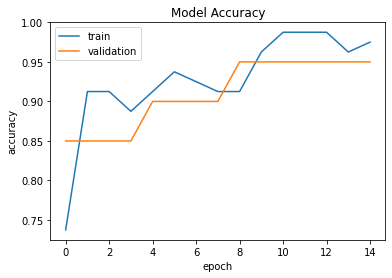

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')